In [1]:
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

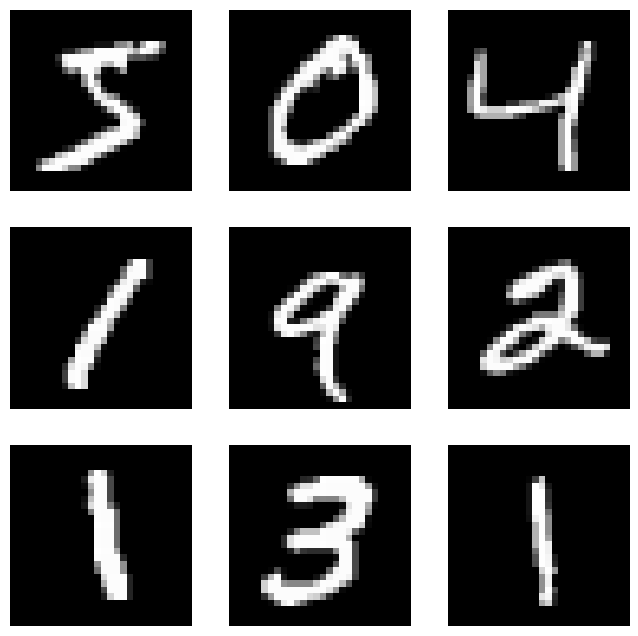

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i in range(3):
  for j in range(3):
    index = i * 3 + j
    ax = axes[i][j]
    ax.imshow(x_train[index], cmap='gray')
    ax.axis('off')

plt.show()

In [5]:
x_train, x_test = x_train/255.0, x_test/255.0

##기본NN

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from keras.optimizers import Adam
from tensorflow import keras

In [7]:
from keras.api._v2.keras import activations
input_ = keras.layers.Input(shape=[28,28])
flat = keras.layers.Flatten(input_shape=[28,28])(input_)
hidden1 = keras.layers.Dense(32, activation='relu')(flat)
hidden2 = keras.layers.Dense(32, activation='relu')(hidden1)
output = keras.layers.Dense(10, activation='softmax')(hidden2)
model = keras.Model(inputs=[input_], outputs=[output])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [9]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

In [10]:
history = model.fit(x_train, y_train, batch_size=256, epochs=50000, validation_split=0.1, callbacks=[early_stopping_cb])

Epoch 1/50000
211/211 [==============================] - 2s 5ms/step - loss: 0.6602 - accuracy: 0.8200 - val_loss: 0.2429 - val_accuracy: 0.9338
Epoch 2/50000
211/211 [==============================] - 1s 4ms/step - loss: 0.2603 - accuracy: 0.9267 - val_loss: 0.1847 - val_accuracy: 0.9490
Epoch 3/50000
211/211 [==============================] - 1s 5ms/step - loss: 0.2129 - accuracy: 0.9385 - val_loss: 0.1604 - val_accuracy: 0.9578
Epoch 4/50000
211/211 [==============================] - 1s 4ms/step - loss: 0.1865 - accuracy: 0.9453 - val_loss: 0.1440 - val_accuracy: 0.9590
Epoch 5/50000
211/211 [==============================] - 1s 3ms/step - loss: 0.1683 - accuracy: 0.9517 - val_loss: 0.1344 - val_accuracy: 0.9590
Epoch 6/50000
211/211 [==============================] - 1s 3ms/step - loss: 0.1531 - accuracy: 0.9550 - val_loss: 0.1288 - val_accuracy: 0.9632
Epoch 7/50000
211/211 [==============================] - 1s 3ms/step - loss: 0.1408 - accuracy: 0.9586 - val_loss: 0.1202 - val_ac

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1137 - accuracy: 0.9670


[0.11373266577720642, 0.9670000076293945]

##CNN

In [12]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [13]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [15]:
model2 = Sequential()
model2.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D(2))
model2.add(Conv2D(64, 3, activation='relu', padding='same'))
model2.add(MaxPooling2D(2))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [16]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model2.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 6s 6ms/step - loss: 0.2061 - accuracy: 0.9389 - val_loss: 0.0533 - val_accuracy: 0.9857
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0530 - accuracy: 0.9834 - val_loss: 0.0411 - val_accuracy: 0.9880
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0366 - accuracy: 0.9886 - val_loss: 0.0356 - val_accuracy: 0.9900
Epoch 4/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0269 - accuracy: 0.9916 - val_loss: 0.0334 - val_accuracy: 0.9892
Epoch 5/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0217 - accuracy: 0.9928 - val_loss: 0.0347 - val_accuracy: 0.9900
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0168 - accuracy: 0.9946 - val_loss: 0.0332 - val_accuracy: 0.9898
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0123 - accuracy: 0.9961 - val_loss: 0.0338 - val_accuracy: 0.9922
Epoch 

##추론

In [18]:
from PIL import Image

# 이미지 파일 경로 지정
image_file = "/content/drive/MyDrive/Colab Notebooks/data/mnist/5_1.png"

# 이미지 불러오기
image = Image.open(image_file)

# 이미지 크기 변경 및 흑백 처리
image = image.convert('L').resize((28, 28))

# 이미지 데이터를 numpy 배열로 변환
image_array = np.array(image)

# 배열 크기를 [1, 28, 28]로 변환
image_array = image_array.reshape([1,28, 28])

# 결과 출력
print(image_array.shape)


(1, 28, 28)


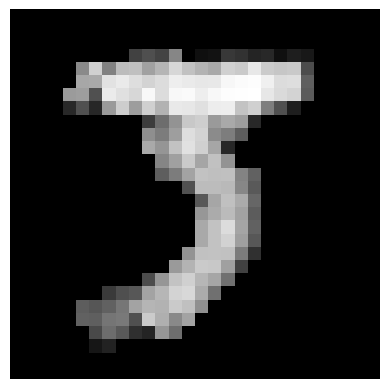

In [19]:
plt.imshow(image_array[0], cmap='gray')
plt.axis('off')
plt.show()

In [20]:
image_sample = image_array/255.0

In [24]:
y_pred = model2.predict(image_sample)
pred_classes = np.argmax(y_pred, axis=1)
print('예측 결과:', pred_classes[0])

1/1 [==============================] - 0s 19ms/step
예측 결과: 3
